In [1]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from ast import literal_eval
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Lectura de archivos
df1 = pd.read_csv('data/tmdb_5000_credits.csv') #Creditos de cada pelicula
df2 = pd.read_csv('data/tmdb_5000_movies.csv') #Datos varios sobre peliculas

## Lectura:



In [3]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


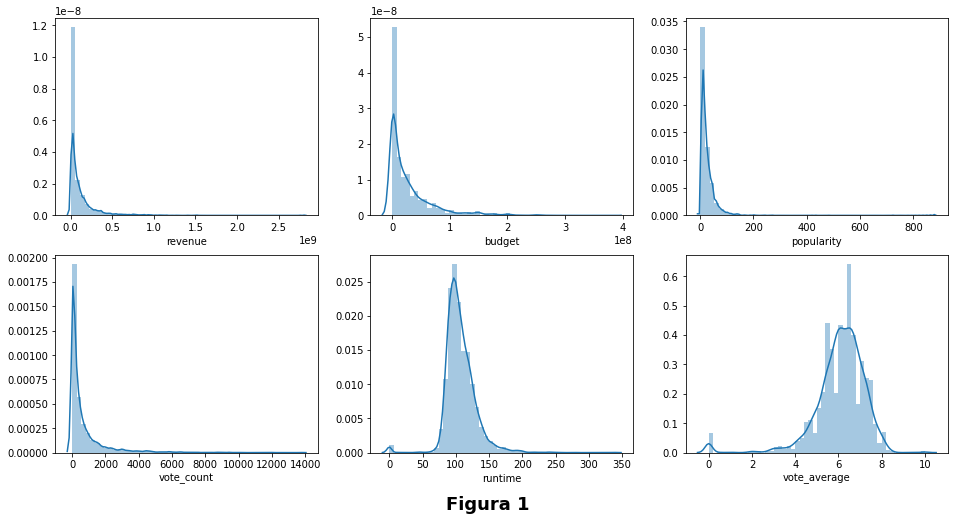

In [5]:
#Lectura de datos
numeric_features = list(df2.dtypes[df2.dtypes != "object"].index)
n_show = len(numeric_features)-1

fig, axes = plt.subplots(figsize=(16,4*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=3)
sns.distplot(df2[numeric_features[0]], hist=True, rug=False, kde=True, ax=axes[1//4,1%3],label=numeric_features[0])
for i in range(2,7):
    sns.distplot(df2[numeric_features[i]], hist=True, rug=False, kde=True, ax=axes[i//4,i%3],label=numeric_features[i])
plt.suptitle("Figura 1",fontsize=18, weight='bold', y = 0.05)
plt.show()

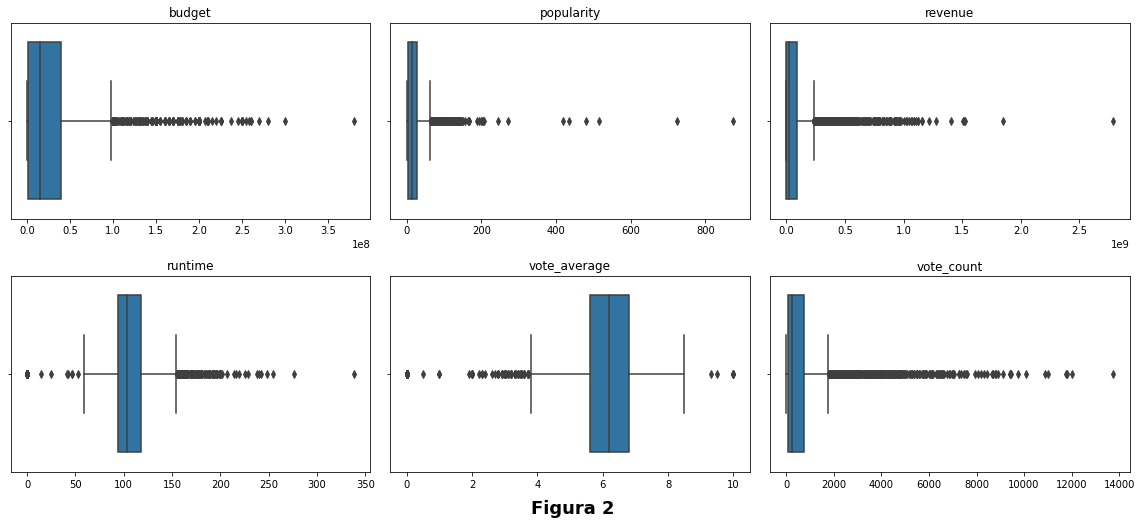

In [6]:
fig, axes = plt.subplots(figsize=(16,3.5*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=3)
numeric_features = ['budget',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count']

for i, column in enumerate(numeric_features[:n_show]):
    sns.boxplot(x=df2[column],ax=axes[i//3,i%3])
    axes[i//3,i%3].set_xlabel("")
    axes[i//3,i%3].set_title(column)
fig.tight_layout()
plt.suptitle("Figura 2",fontsize=18, weight='bold', y = 0)
plt.show()

In [7]:
categorical_var = ["original_language","status"]
idiomas = df2["original_language"]
data_count = df2.groupby("original_language")["original_language"].count()
print("Hay",len(idiomas.unique()),"idiomas diferentes:\n", idiomas.unique())

Hay 37 idiomas diferentes:
 ['en' 'ja' 'fr' 'zh' 'es' 'de' 'hi' 'ru' 'ko' 'te' 'cn' 'it' 'nl' 'ta'
 'sv' 'th' 'da' 'xx' 'hu' 'cs' 'pt' 'is' 'tr' 'nb' 'af' 'pl' 'he' 'ar'
 'vi' 'ky' 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el']


In [8]:
print("La mayoria de las peliculas son en ingles y son",data_count["en"])

La mayoria de las peliculas son en ingles y son 4505


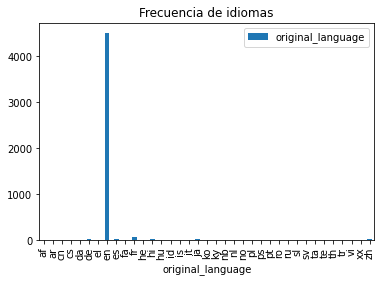

In [9]:
data_count.plot.bar(legend = True,title = "Frecuencia de idiomas")
plt.show()

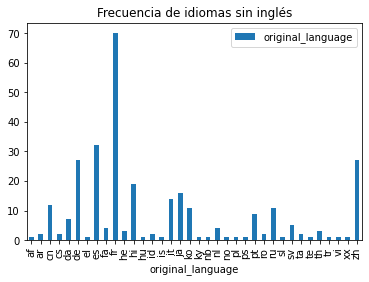

In [10]:
data_sin_ingles = data_count[data_count.values != 4505]
data_sin_ingles.plot.bar(legend = True,title = "Frecuencia de idiomas sin inglés")
plt.show()

Hay 3 status diferentes

 status posibles: ['Released' 'Post Production' 'Rumored']


<AxesSubplot:title={'center':'Status'}, xlabel='status'>

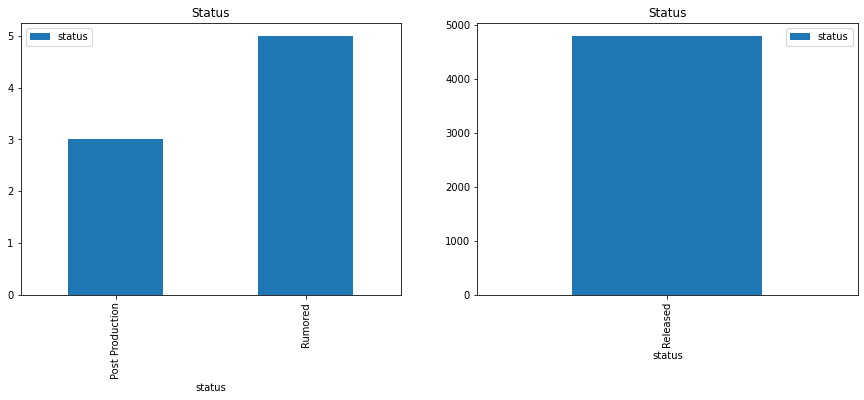

In [11]:
data_count = df2.groupby("status")["status"].count()
print("Hay",len(data_count),"status diferentes")
print("\n status posibles:",df2["status"].unique())
fig = plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
data_count[["Post Production","Rumored"]].plot.bar(legend = True,title = "Status")
plt.subplot(1,2,2)
data_count[["Released"]].plot.bar(legend = True,title = "Status")

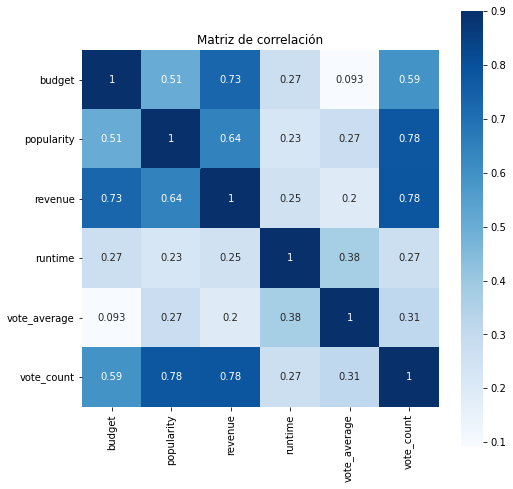

In [12]:
corrmat = df2[numeric_features[:n_show]].corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.9, square=True, ax=ax,cmap="Blues",annot=True)
ax.set_title("Matriz de correlación")
plt.show()

# Preprocesamiento : 

Como podemos notar ambos datasets poseen en común la columna id - movie_id por lo que juntaremos todo debido a que la información del dataset con los créditos complementa la información del otro dataset

In [13]:
#Primero cambiamos el nombre de las columnas de df1 para que coincida movie_id con id
df1.columns = ["id","title","cast","crew"]
df = df2.merge(df1,on = "id")

In [14]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


Hay presencia de valores perdidos por lo que se procesan eliminandose y viendo que tanta información se pierde con esto:

In [15]:
tamanio_original = len(df)
df_without_nan = df.dropna()
tamanio_nuevo = len(df_without_nan)
print("Al procesar los valores NaN pasamos de ",tamanio_original,"datos, a tener",tamanio_nuevo,"datos")

Al procesar los valores NaN pasamos de  4803 datos, a tener 1493 datos


Por esto no es conveniente eliminar directamente, vamos a analizar cada columna y visualizar valores perdidos, esto pues por ejemplo, no todas las peliculas tienen una pagina web por lo que homepage es propensa a tener valores NaN

In [16]:
columnas = df.columns
valores_perdidos = []
for col in columnas:
    if df[col].isnull().sum()>0:
        valores_perdidos.append([col,df[col].isnull().sum()])

In [17]:
data_perdida = pd.DataFrame(data = valores_perdidos,columns = ["Nombre Columna","Valores Perdidos"])
data_perdida

,Nombre Columna,Valores Perdidos
0,homepage,3091
1,overview,3
2,release_date,1
3,runtime,2
4,tagline,844


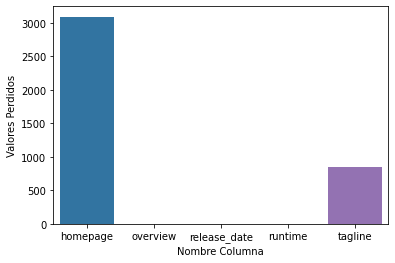

In [18]:
ax = sns.barplot(x="Nombre Columna", y="Valores Perdidos", data=data_perdida)
plt.show()

Podemos notar que las columnas homepage y tagline poseen muchos valores perdidos por lo que no consideraremos estas columnas para nuestro análisis

In [19]:
df = df.drop(["homepage","tagline"],axis=1)

In [20]:
df = df.dropna()

In [21]:
tamanio_nuevo = len(df)
print("Al procesar los valores NaN pasamos de tener",tamanio_original,"datos, a tener",tamanio_nuevo,"datos")

Al procesar los valores NaN pasamos de tener 4803 datos, a tener 4799 datos


Al observar la información sobre los datos y su estructura podemos notar que hay columnas de tipo objeto que son listas y que contienen listas vacias sin información por lo que debemos limpiar esto:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  release_date          4799 non-null   object 
 11  revenue               4799 non-null   int64  
 12  runtime               4799 non-null   float64
 13  spoken_languages      4799 non-null   object 
 14  status                4799 non-null   object 
 15  title_x              

In [23]:
def plot_missing_values(df):
    '''
    plot_missing_values(df)

    Grafica los valores perdidos por columna

    Parameters
    ----------
    df : DataFrame
        DataFrame sin editar. 

    Returns
    -------
    output : None
        No retorna nada

    '''
    #Se definen variables auxiliares
    columns = df.columns
    valores_perdidos = []

    #Iteramos sobre las columnas y si encuuentra al menos un "[]" y "" los almacena en la lista de valores perdidos.
    for col in columns:
        if sum(df[col] == "[]")>0:
            valores_perdidos.append([col,sum(df[col] == "[]")])
        if sum(df[col] == ""):
            valores_perdidos.append([col,sum(df[col] == "")])
    data_perdida = pd.DataFrame(data = valores_perdidos,columns = ["Nombre Columna","Valores Perdidos"])

    #Grafico

    figure(figsize=(15,6))
    ax = sns.barplot(x="Nombre Columna", y="Valores Perdidos", data=data_perdida)
    ax.set_title("Cantidad de valores perdidos por columna")

Mediante una vista directa al csv de los datos notamos que habían elementos que si bien no eran NaN, seguían siendo "vacíos", por ejemplo en la columna keywords:


In [24]:
df[df["keywords"]=="[]"].head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title_x,vote_average,vote_count,title_y,cast,crew
71,145000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",1735,[],en,The Mummy: Tomb of the Dragon Emperor,"Archaeologist Rick O'Connell travels to China,...",60.034162,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",...,401128639,112.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Mummy: Tomb of the Dragon Emperor,5.2,1387,The Mummy: Tomb of the Dragon Emperor,"[{""cast_id"": 1, ""character"": ""Richard O'Connel...","[{""credit_id"": ""52fe4312c3a36847f80384c5"", ""de..."
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",...,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Lovers,4.8,34,The Lovers,"[{""cast_id"": 11, ""character"": ""James Stewart /...","[{""credit_id"": ""52fe49e0c3a368484e145067"", ""de..."


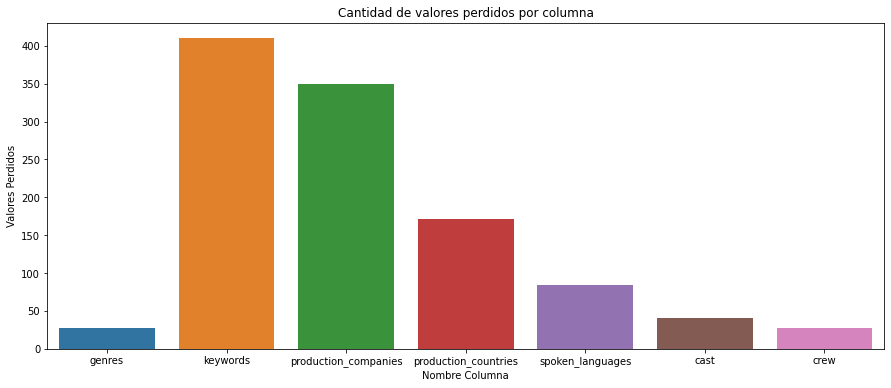

In [25]:
plot_missing_values(df)

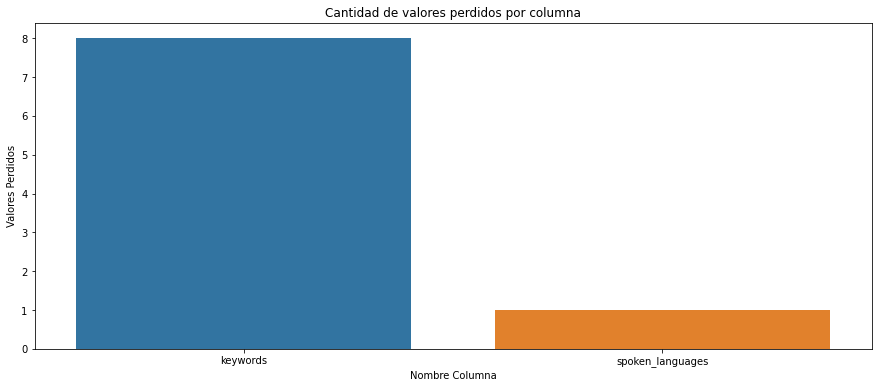

In [26]:
data = df[df["popularity"]>=df["popularity"].mean()]
plot_missing_values(data)

Podemos ver que la cantidad de valores perdidos (los cuales consideramos como "[]") son pocos relativo a la cantidad de datos que se tienen por lo que eliminaremos los datos que tienen keyword sin datos ya que poseen baja popularidad (bajo la media). Utilizando el mismo método, comprobamos que las películas que tienen valores perdidos (en forma de "[]") en la columna keywords no son populares.

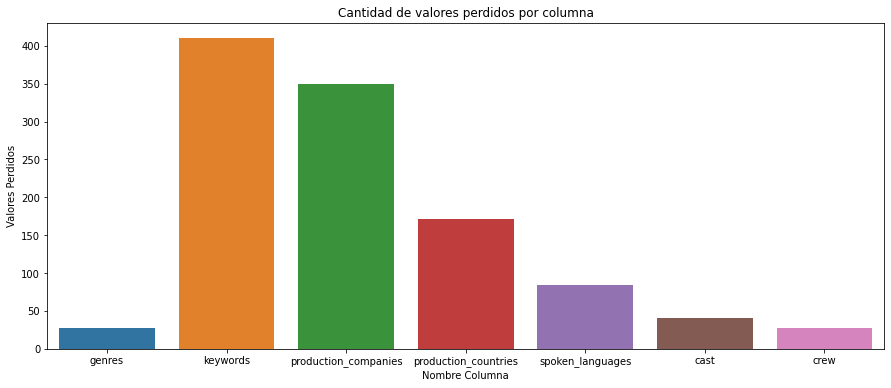

In [27]:
plot_missing_values(df)

En nuestro modelo vamos a utilizar todas las columnas mostradas menos "spoken_languages", por lo cual es necesario eliminar las filas que contengan datos vacios en forma de "[]" de las columnas a utilizar.

In [28]:
data_copy = df
data_copy = data_copy.reset_index()

In [29]:
def drop_row(df,columna):

    '''
    drop_row(df)

    Elimina las filas con valores "NaN" y "[]"

    Parameters
    ----------
    df : DataFrame
        DataFrame al que se le eliminará la fila.

    columna: panda.Series
         Columna que contiene valores "NaN" y  "[]"

    Returns
    -------
    output : df
        Retorna el DataFrame editado

    '''
    #Definición de variables

    col = df[columna]
    L = []

    #Iteramos sobre las columnas y almacenamos en la lista L los valores "[]" para luego ser reemplazados por "NaN"
    for element in col:
        if element == "[]":
            L.append(float("NaN"))
        else:
            L.append(element)
    df[columna] = L

    #Se dropean las filas que contengan los valores "NaN"
    df = df.dropna()
    return df

data_copy = drop_row(df,"keywords")
data_copy

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,"[{""id"": 18, ""name"": ""Drama""}]",124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Bang,6.0,1,Bang,"[{""cast_id"": 2, ""character"": ""The Girl"", ""cred...","[{""credit_id"": ""52fe4ab0c3a368484e161add"", ""de..."
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""iso_3166_1"": ""US"", ""n

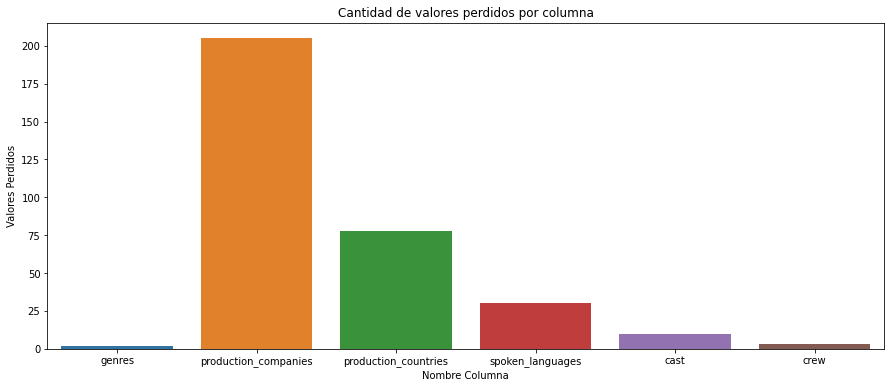

In [30]:
plot_missing_values(data_copy)

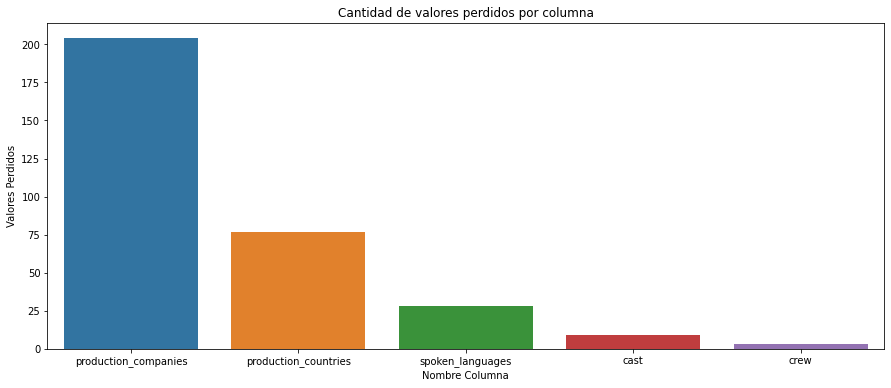

In [31]:
data_copy = drop_row(data_copy,"genres")
plot_missing_values(data_copy)

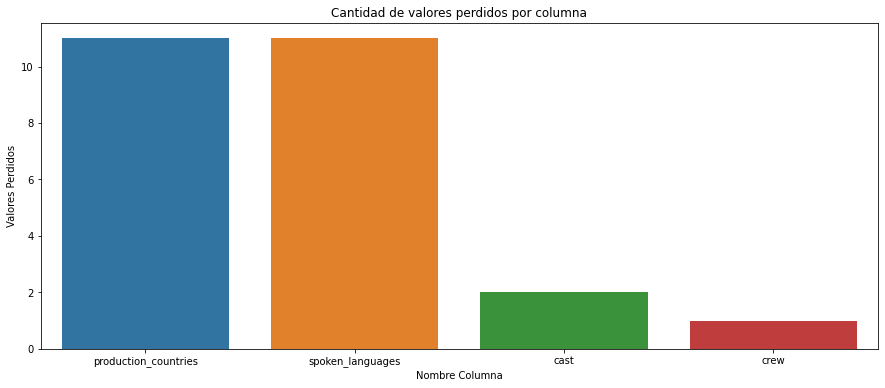

In [32]:
data_copy = drop_row(data_copy,"production_companies")
plot_missing_values(data_copy)

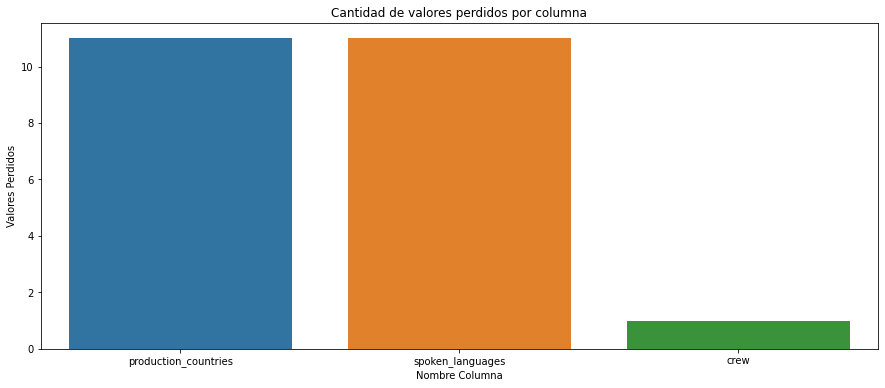

In [33]:
data_copy = drop_row(data_copy,"cast")
plot_missing_values(data_copy)

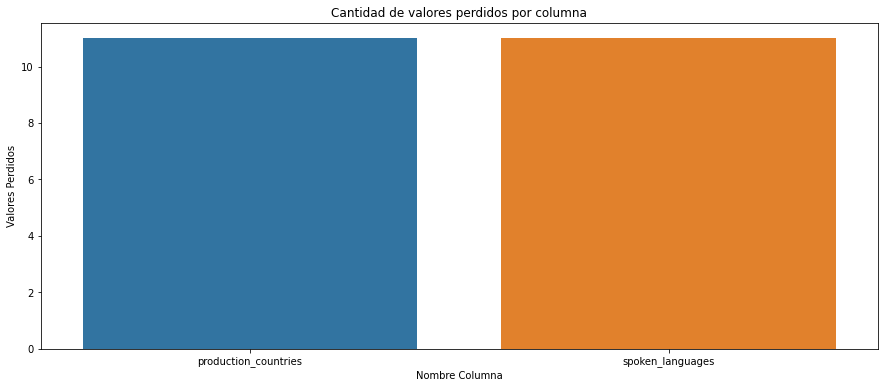

In [34]:
data_copy = drop_row(data_copy,"crew")
plot_missing_values(data_copy)

In [35]:
data_copy = drop_row(data_copy,"production_countries")

Luego de limpiar el dataset se puede observar que solo quedan valores vacíos e la columna "spoken_languages":

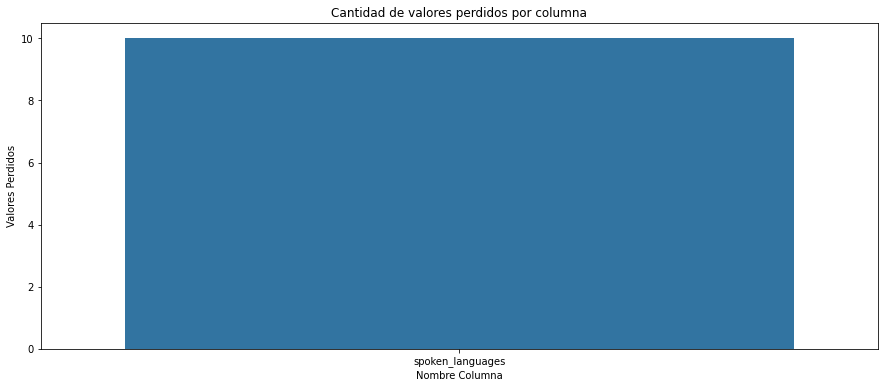

In [36]:
plot_missing_values(data_copy)

In [37]:
data_copy["title"] = data_copy["title_x"]
data_copy = data_copy.drop(["original_title","title_x","title_y"],axis = 1)
data_copy

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,cast,crew,title
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,"[{""id"": 18, ""name"": ""Drama""}]",124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",en,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-09-09,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.0,1,"[{""cast_id"": 2, ""character"": ""The Girl"", ""cred...","[{""credit_id"": ""52fe4ab0c3a368484e161add"", ""de...",Bang
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Friends/fledgling entrepreneurs invent a devic...,23.307949,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.9,658,"[{""cast_id"": 1, ""character"": ""Aaron"", ""credit_...",

## Modelo:

Luego de tener ya preprocesado el dataset, utilizaremos el modelo propuesto en [Getting Started with a Movie Recommendation System](https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system/data?select=tmdb_5000_credits.csv), en particular "Content Based Filtering", para proponer un sistema de recomendación de películas. Usaremos similaridad coseno para determinar una cantidad numérica que represente la similaridad entre dos peliculas. 

$$cos(\theta) = \frac{\textbf{A}\cdot\textbf{B}}{\Vert \textbf{A}\Vert \cdot \Vert \textbf{B}\Vert}$$


Se realizan funciones para determinar el director y en este caso se seleccionaron las 3 principales de cada tipo de los siguientes atributos:

 * Géneros (genre)
 * Actores (cast)
 * Compañias de producción (Production Companies)
 * Países de producción (Production Countries)
 * Palabras clave (keywords)

In [38]:
def get_director(x):
    """
    
    get_director(x)

    Toma una series con diccionarios, y comprueba si existe el trabajo director, si es así retorna el director.

    Parameters
    ----------
    x : Pd.Series
        Serie con los elementos para obtener el director

    Returns
    --------
    output : String
             Retorna un string con el nombre del director si el trabajo existe.
             Si el no existe el trabajo director, retorna nan.

    
    """
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [39]:
# Retorna una lista con los 3 primeros elemntos o la lista entera, la que tenga más elementos.
def get_list(x):
    """

    get_list(x)

    Retorna una lista con los 3 primeros elemntos o la lista entera, la que tenga más elementos.

    Parameters
    -----------
    x : List
        Lista

    Returns
    --------
    output : List
             Retorna una lista con los primeros 3 elementos de la lista, o la lista entera.
    
    """
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Si la lista tiene más de tres elementos, entonces se retornan los primeros tres nombres, si no, se retorna la lista entera.
        if len(names) > 3:
            names = names[:3]
        return names

    #Retorna una lista vacia en caso de que hayan datos perdidos o corruptos.
    return []

In [40]:
data_copy["cast"] = data_copy["cast"].apply(literal_eval)
data_copy["keywords"] = data_copy["keywords"].apply(literal_eval)
data_copy["genres"] = data_copy["genres"].apply(literal_eval)
data_copy["production_companies"] = data_copy["production_companies"].apply(literal_eval)
data_copy["production_countries"] = data_copy["production_countries"].apply(literal_eval)
data_copy["crew"] = data_copy["crew"].apply(literal_eval)

data_copy

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,cast,crew,title
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Avatar
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Pirates of the Caribbean: At World's End
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Spectre
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,7.6,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",The Dark Knight Rises
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.1,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",John Carter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,"[{'id': 18, 'name': 'Drama'}]",124606,"[{'id': 10726, 'name': 'gang'}, {'id': 33928, ...",en,A young woman in L.A. is having a bad day: she...,0.918116,"[{'name': 'Asylum Films', 'id': 10571}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-09-09,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.0,1,"[{'cast_id': 2, 'character': 'The Girl', 'cred...","[{'credit_id': '52fe4ab0c3a368484e161add', 'de...",Bang
4796,7000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",14337,"[{'id': 1448, 'name': 'distrust'}, {'id': 2101...",en,Friends/fledgling entrepreneurs invent a devic...,23.307949,"[{'name': 'Thinkfilm', 'id': 446}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.9,658,"[{'cast_id': 1, 'character': 'Aaron', 'credit_...","[{'credit_id': '52fe45e79251416c75066791', 'de...",Primer
4798,220000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",9367,"[{'id': 5616, 'name': 'united states–mexico ba...",es,El Mariachi just wants to play his guitar and ...,14.269792,"[{'name': 'Columbia Pictures', 'id': 5}]","[

In [41]:
data_copy['director'] = data_copy['crew'].apply(get_director)
features = ["production_countries","production_companies",'cast', 'keywords', 'genres']
for feature in features:
    data_copy[feature] = data_copy[feature].apply(get_list)

In [42]:
data_copy[['title' ,"production_countries","production_companies",'cast', 'director', 'keywords', 'genres']].head(3)

,title,production_countries,production_companies,cast,director,keywords,genres
0,Avatar,"[United States of America, United Kingdom]","[Ingenious Film Partners, Twentieth Century Fo...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,[United States of America],"[Walt Disney Pictures, Jerry Bruckheimer Films...","[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[United Kingdom, United States of America]","[Columbia Pictures, Danjaq, B24]","[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


Luego, se convierten todos los strings a minúscula y se quitan los espacios de los nombres en todas las columnas de interés:


In [43]:
def clean_data(x):
    """
    clean_data(x)

    convierte todos los string a minúscula y quita los espacios de los nombres

    Parameters
    -----------
    x : List
        Lista que se quiere limpiar
    
    Returns
    --------
    output : Retorna una lista con strings en minúsculas sín espacios si el elemento es una lista.
             Si el elemento no es una lista, pero es un string, se retorna el string en minúscula y sín espacios.
             Si no es ni una lista ni un string, se retorna un string vacio. 

    """
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Revisa si el director existe. Si no, retorna un string vacio
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [44]:
# Se aplica la función clean_data a tus cualidades.
features = ["production_countries","production_companies",'cast', 'keywords', 'director', 'genres']

for feature in features:
    data_copy[feature] = data_copy[feature].apply(clean_data)

In [45]:
data_copy.head(3)

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,cast,crew,title,director
0,237000000,"[action, adventure, fantasy]",19995,"[cultureclash, future, spacewar]",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[ingeniousfilmpartners, twentiethcenturyfoxfil...","[unitedstatesofamerica, unitedkingdom]",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",Avatar,jamescameron
1,300000000,"[adventure, fantasy, action]",285,"[ocean, drugabuse, exoticisland]",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[waltdisneypictures, jerrybruckheimerfilms, se...",[unitedstatesofamerica],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Pirates of the Caribbean: At World's End,goreverbinski
2,245000000,"[action, adventure, crime]",206647,"[spy, basedonnovel, secretagent]",en,A cryptic message from Bond’s past sends him o...,107.376788,"[columbiapictures, danjaq, b24]","[unitedkingdom, unitedstatesofamerica]",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Spectre,sammendes


In [46]:
# Se crea un vector en formato String con las características de la pélicula
def create_soup(x):
    """
    create_soup(x)

    Se crea  un vector en formato String con las características de la pélicula

    Parameters
    -----------
    x : Dataframe
        Dataframe principal con las películas a analizar 
    
    Returns
    ----------
    output: string
            string con las características de la película
    """
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])+' '+' '.join(x["production_companies"])+' '+' '.join(x["production_countries"])
data_copy['soup'] = data_copy.apply(create_soup, axis=1)

In [47]:
data_copy["soup"][0]

'cultureclash future spacewar samworthington zoesaldana sigourneyweaver jamescameron action adventure fantasy ingeniousfilmpartners twentiethcenturyfoxfilmcorporation duneentertainment unitedstatesofamerica unitedkingdom'

In [48]:
# Se importa CountVectorizer y se crea la matriz de conteo
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data_copy['soup'])

In [49]:
# Se calcula la matriz de similaridad por coseno basada en la matriz de conteo
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

## Resultados (gráficos)

In [50]:
# Se restablece el indice del DataFrame principal y se construye un mapeo inverso como se realizo anteriormente
data_copy = data_copy.reset_index()
indices = pd.Series(data_copy.index, index=data_copy['title'])

In [51]:
def get_recommendations(title, cosine_sim=cosine_sim2):
    """
    get_recommendations(tittle,cosine_sim=cosine_sim)

    Función que toma el título de películas como input y entrega como resultado las 10 películas más similares 

    Parameters
    -----------
    title : String
            Título de la película
    
    Returns
    ---------
    output : Object
             Serie con las 10 películas más similares
    """
    # Obtiene el índice de la película que calza con el título
    idx = indices[title]

    # Obtiene la puntuación de similaridad de a pares con todas las películas del dataset
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordena las películas respecto a la puntuación de similaridad
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtiene la puntuación de las 10 películas con mejor puntuación
    sim_scores = sim_scores[1:11]

    # obtiene el índice de las películas
    movie_indices = [i[0] for i in sim_scores]

    # retorna las 10 películas más similares
    return data_copy['title'].iloc[movie_indices]

In [52]:
# Función que toma el título de películas como input y entrega como resultado las 10 películas más similares 
def get_recommendations_graphics(title, cosine_sim=cosine_sim2):
    # Obtiene el índice de la película que calza con el título
    idx = indices[title]

    # Obtiene la puntuación de similaridad de a pares con todas las películas del dataset
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordena las películas respecto a la puntuación de similaridad
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtiene la puntuación de las 10 películas con mejor puntuación
    sim_scores = sim_scores[1:11]

    # obtiene el índice de las películas
    movie_indices = [i[0] for i in sim_scores]

    # Las 10 películas más similares
    movies = data_copy['title'].iloc[movie_indices]
    sim_scores = [i[1] for i in sim_scores]

    fig = plt.figure(figsize = (10,5))
    plt.bar(movies,sim_scores)
    plt.xticks(rotation = 90)
    return

In [53]:
get_recommendations('The Avengers', cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
78                              Iron Man 2
167     Captain America: The First Avenger
83     Captain America: The Winter Soldier
172                    The Incredible Hulk
68                                Iron Man
180                                Ant-Man
31                              Iron Man 3
92                 Guardians of the Galaxy
Name: title, dtype: object

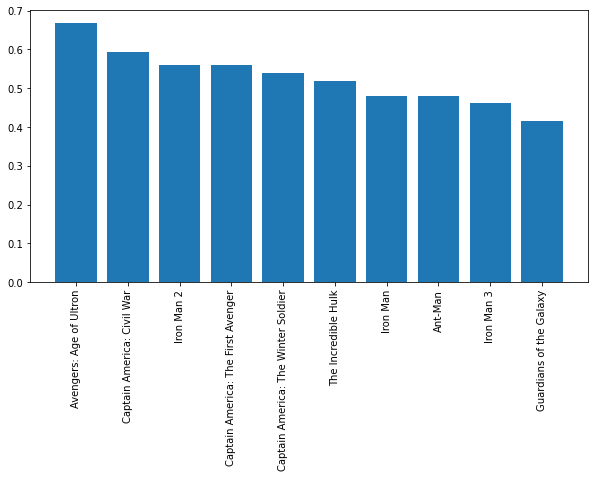

In [54]:
get_recommendations_graphics('The Avengers', cosine_sim2)

In [55]:
get_recommendations('The Godfather', cosine_sim2)

857     The Godfather: Part III
2600     The Godfather: Part II
1190              The Rainmaker
1151    The Talented Mr. Ripley
3818           The Conversation
1491             Apocalypse Now
1783           The Untouchables
1804                   Scarface
2142            We're No Angels
2198                Sea of Love
Name: title, dtype: object

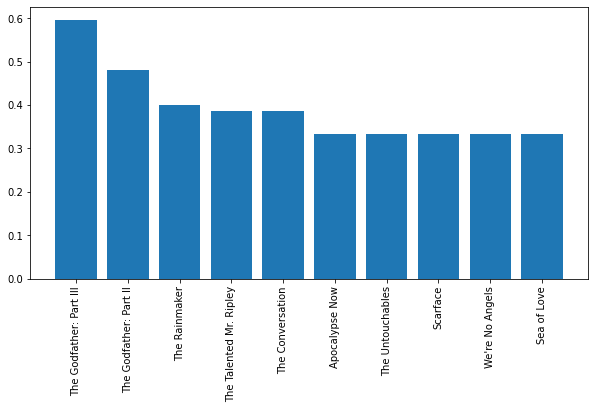

In [56]:
get_recommendations_graphics('The Godfather', cosine_sim2)

In [57]:
get_recommendations('Minions', cosine_sim2)

67                             Monsters vs Aliens
500                               Despicable Me 2
607                                 Despicable Me
964                                The Iron Giant
2667                         The Land Before Time
354                     Atlantis: The Lost Empire
497          The Adventures of Rocky & Bullwinkle
2685    Harold & Kumar Escape from Guantanamo Bay
2886                                    MacGruber
128                                          Bolt
Name: title, dtype: object

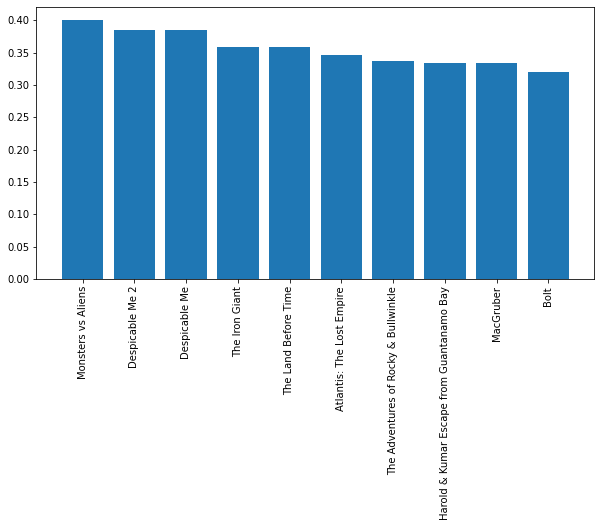

In [58]:
get_recommendations_graphics('Minions', cosine_sim2)